Shift + Entrée pour avancer dans le notebook

In [23]:
from ipycanvas import Canvas
from typing import List

import math

def dessine_tresse(tresse: List[int], en_couleur = True, couleur_fond = 'white',
                  fraction_brin = 5, fraction_trou = 12) -> Canvas :
    """ Dessine une tresse sur un Canvas d'après son mot
    
        Args:
            tresse: mot de tresse
            
        Return:
            le canvas avec le dessin
    """

    # calcul de la taille des éléments
    maille = 60
    demi_maille = maille / 2    
    n = abs(max(tresse, key = lambda x:abs(x))) # nombre de colonnes
    largeur = n * maille + 25  
    hauteur = len(tresse)*maille +20
    
    # calcul sur les liens
    largeur_brin = maille / fraction_brin
    if fraction_trou == 0: largeur_trou = 0 
    else: largeur_trou = maille / fraction_trou
   
    # création du canvas. Le dernier argument c'est pour pouvoir faire l'export en png
    canvas = Canvas(width=largeur, height = hauteur, sync_image_data=True) 
    
    # un fond en couleur
    fond = couleur_fond
    canvas.global_alpha = 1
    canvas.fill_style = fond
    canvas.fill_rect(0, 0, largeur, hauteur)
   
    
    # couleur et style des lignes
    canvas.line_cap = 'round'

    if en_couleur: couleurs = ['green', 'yellow', 'pink', 'red', 'blue', 'orange']
    else: couleurs = ['black', 'black', 'black', 'black', 'black', 'black']
        
    couleurs = couleurs * (n // len(couleurs) + 1) # il faut au moins autant des couleurs pour tous les brins
    
    # on prend une marge
    canvas.translate(10, 10)
    
    # on se donne une fonction pour dessiner une ligne avec un croisement sigma
    def cross(sigma): 
        colonne = abs(sigma) - 1
        canvas.save()
        
        def de_gauche_a_droite(couleur, devant):  # pour dessiner un brin en diagonale gauche droite
            if not(devant):
                canvas.save()
                canvas.begin_path()
                canvas.stroke_style = couleur
                canvas.line_width = largeur_brin         
                canvas.move_to(0 , 0)
                canvas.line_to(demi_maille - 2.5 * largeur_trou, demi_maille - 2.5 * largeur_trou)
                #canvas.bezier_curve_to(0, demi_maille/2, 
                #                       0, 0,  
                #                       demi_maille - 2 * largeur_trou, demi_maille - 2 * largeur_trou)
                canvas.stroke()
                canvas.restore()
                canvas.begin_path()
                canvas.stroke_style = couleur
                canvas.line_width = largeur_brin
                canvas.move_to(demi_maille + 2.5 * largeur_trou, demi_maille + 2.5 * largeur_trou)
                canvas.line_to(maille, maille)
                #canvas.bezier_curve_to(0, 0, maille, demi_maille, maille, maille)
                canvas.stroke()
            else:
                canvas.save()
                canvas.begin_path()
                canvas.stroke_style = couleur
                canvas.line_width = largeur_brin         
                canvas.move_to(0 , 0)
                canvas.line_to(maille, maille)
                #canvas.bezier_curve_to(demi_maille, 0, 0, 0, 
                #                        demi_maille - 2*largeur_trou, demi_maille - 2*largeur_trou)
                canvas.stroke()
                canvas.restore()
                
                    
            
            
        def de_droite_a_gauche(couleur,devant): # pour dessiner un brin en diagonale droite gauche
            if not(devant):
                canvas.save()
                canvas.begin_path()
                canvas.stroke_style = couleur
                canvas.line_width = largeur_brin
                canvas.move_to(maille, 0)
                canvas.line_to(demi_maille + 2.5 * largeur_trou, demi_maille - 2.5 * largeur_trou)
                #canvas.bezier_curve_to(maille, demi_maille, 0, maille - demi_maille, 0, maille)
                canvas.stroke()
                canvas.restore()
                canvas.begin_path()
                canvas.stroke_style = couleur
                canvas.line_width = largeur_brin
                canvas.move_to(demi_maille - 2.5 * largeur_trou, demi_maille + 2.5 * largeur_trou)
                canvas.line_to(0, maille)
                #canvas.bezier_curve_to(maille, demi_maille, 0, maille - demi_maille, 0, maille+1)
                canvas.stroke()
            else:
                canvas.save()
                canvas.begin_path()
                canvas.stroke_style = couleur
                canvas.line_width = largeur_brin
                canvas.move_to(maille, 0)
                canvas.line_to(0, maille)
                #canvas.bezier_curve_to(maille, demi_maille, 0, maille - demi_maille, 0, maille)
                canvas.stroke()
                canvas.restore()

                
        def tout_droit(cln):        # pour dessiner brin tout droit
            canvas.begin_path()
            canvas.stroke_style = couleurs[cln]
            canvas.move_to(0 , 0)
            canvas.line_width = largeur_brin
            canvas.line_to(0, maille)
            canvas.stroke()
        
        for i in range(n+1):              # on boucle sur les colonnes
            if i == colonne:              # c'est un croisement
                if sigma > 0:             # il est positif                   
                    de_gauche_a_droite(couleurs[colonne],False)
                    de_droite_a_gauche(couleurs[colonne + 1],True)
                else:                     # il est négatif
                    de_droite_a_gauche(couleurs[colonne + 1],False)
                    de_gauche_a_droite(couleurs[colonne],True)
            elif i < colonne or i > colonne + 1:  # c'est tout droit
                tout_droit(i)
        
            canvas.translate(maille, 0)  # quoiqu'il arrive on se décale d'une colonne à droite      

        canvas.restore()

        # on permute les colonnes correspondant au générateur traité
        couleurs[colonne], couleurs[colonne + 1] = couleurs[colonne + 1], couleurs[colonne] 

   
    for sigma in tresse:          # on boucle sur les générateurs
        cross(sigma)              # on dessine la ligne
        canvas.translate(0, maille)  # on descend d'une ligne
        
    return canvas   


La tresse $ \sigma_4 \sigma_{-2} \sigma_3 \sigma_{-2} $
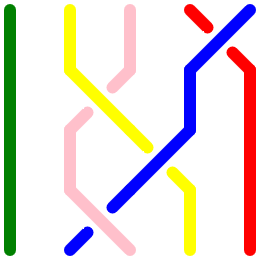

In [24]:
t1 = dessine_tresse([4, -2, 3, -2], fraction_brin=5, fraction_trou=12)
t1

Canvas(height=260, sync_image_data=True, width=265)

La tresse $ \sigma_4 \sigma_3 \sigma_2 \sigma_1 \sigma_1\sigma_2 $
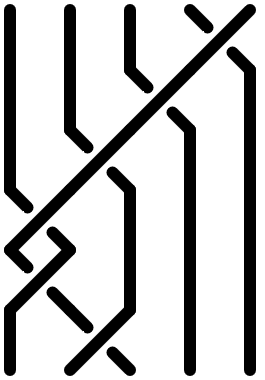

In [25]:
en_couleur = False
t2 = dessine_tresse([4, 3, 2, 1, 1, 2], False)
t2

Canvas(height=380, sync_image_data=True, width=265)

In [26]:
t3 = dessine_tresse([-1, -2, -7])
t3

Canvas(height=200, sync_image_data=True, width=445)

In [27]:
t1.to_file('../imgs/t4m23m2line.png')
t2.to_file('../imgs/nb432112line.png')
t3.to_file('../imgs/m1m2m7line.png')